# GlobaLiB model

The GlobaLiB model presents the main code that has been used in the publication "Think global act local: The dependency of global lithium-ion battery emissions on production location and material sources" to estimate the carbon footprint of battery manufacturing from a global context. The full version of the publication is openly accessible here: https://www.sciencedirect.com/science/article/pii/S0959652624011739.

First, the material demand to produce a kWh of battery pack capacity for different chemistries was estimated, including NMC111, NMC622, NMC811, NCA and LFP. The bill-of-materials for all these chemistries was taken from GREET and material demand was estimated using a 2% cut-off rule.

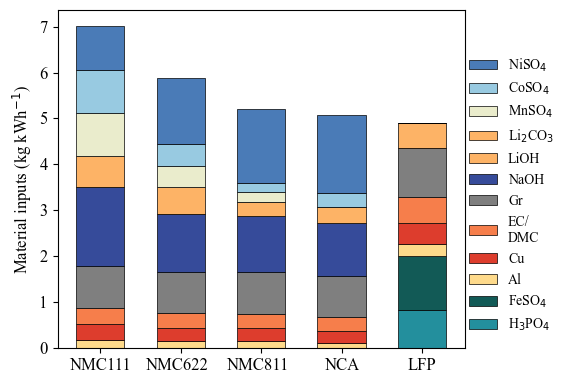

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
plt.rcParams["font.family"] = "Times New Roman"
#Material inputs per kWh for NMC333-Gr based on GREET
akgkWhNaOH=1.72
akgkWhCu=0.33
akgkWhCoSO4=0.95
akgkWhMnSO4=0.93
akgkWhNiSO4=0.95
akgkWhGr=0.9
akgkWhLi2CO3=0.68
akgkWhEC=0.36
akgkWhAl=0.19

#Material inputs per kWh for NMC622-Gr based on GREET
ckgkWhNaOH=1.27
ckgkWhCu=0.29
ckgkWhCoSO4=0.48
ckgkWhMnSO4=0.47
ckgkWhNiSO4=1.44
ckgkWhGr=0.89
ckgkWhLi2CO3=0.57
ckgkWhEC=0.32
ckgkWhAl=0.16


#Material inputs per kWh for NMC811-Gr based on GREET
bkgkWhNaOH=1.23
bkgkWhCu=0.28
bkgkWhCoSO4=0.2
bkgkWhMnSO4=0.2
bkgkWhNiSO4=1.62
bkgkWhGr=0.9
bkgkWhLiOH=0.31
bkgkWhEC=0.31
bkgkWhAl=0.16

#Material inputs per kWh for NCA-Gr from Ecoinvent based on GREET

dkgkWhNaOH=1.15
dkgkWhCu=0.26
dkgkWhCoSO4=0.3
dkgkWhMnSO4=0
dkgkWhNiSO4=1.7
dkgkWhGr=0.9
dkgkWhLiOH=0.34
dkgkWhEC=0.3
dkgkWhAl=0.12

#Material inputs per kWh for LFP from Ecoinvent based on GREET
ekgkWhCu=0.47
ekgkWhFeSO4=1.17
ekgkWhH3PO4= 0.83
ekgkWhGr=1.06
ekgkWhLiOH=0.55
ekgkWhEC=0.57
ekgkWhAl=0.26
#------------------------------------------------
#Plot kg/kWh material demand
battery_types= ['NMC111', 'NMC622  ', 'NMC811  ','NCA','LFP']
materials = ['H$_3$PO$_4$', 'FeSO$_4$', 'Al', 'Cu', 'EC/\nDMC', 'Gr', 'NaOH', 'LiOH', 'Li$_2$CO$_3$', 'MnSO$_4$', 'CoSO$_4$', 'NiSO$_4$']
NMC111= [0, 0, akgkWhAl, akgkWhCu, akgkWhEC, akgkWhGr, akgkWhNaOH, 0, akgkWhLi2CO3, akgkWhMnSO4, akgkWhCoSO4, akgkWhNiSO4 ]
NMC622= [0, 0, ckgkWhAl, ckgkWhCu, ckgkWhEC, ckgkWhGr, ckgkWhNaOH, 0, ckgkWhLi2CO3, ckgkWhMnSO4, ckgkWhCoSO4, ckgkWhNiSO4 ]
NMC811= [0, 0, bkgkWhAl, bkgkWhCu, bkgkWhEC, bkgkWhGr, bkgkWhNaOH, bkgkWhLiOH, 0, bkgkWhMnSO4, bkgkWhCoSO4, bkgkWhNiSO4 ]
NCA= [0, 0, dkgkWhAl, dkgkWhCu, dkgkWhEC, dkgkWhGr, dkgkWhNaOH, dkgkWhLiOH, 0, dkgkWhMnSO4, dkgkWhCoSO4, dkgkWhNiSO4 ]
LFP= [ekgkWhH3PO4, ekgkWhFeSO4, ekgkWhAl, ekgkWhCu, ekgkWhEC, ekgkWhGr, 0, ekgkWhLiOH, 0, 0,0,0 ]

# Bar width
bar_width = 0.6

# X-axis positions for each group of bars
x_pos = np.arange(len(battery_types))

# Set the specified colors for each material
colors = ['#238F9D', '#125A56', '#FEDA8B', '#DD3D2D', '#F67E4B', '#7F7F7F', '#364B9A', '#FDB366', '#FDB366', '#EAECCC', '#98CAE1', '#4A7BB7']

# Create subplots for each battery type
fig, ax = plt.subplots(figsize=(6, 4))

# Initialize bottom values for stacking
bottom_values = np.zeros(len(battery_types))

# Create stacked bars for each material with specified colors
for i, (material, color) in enumerate(zip(materials, colors)):
    plt.bar(x_pos, [NMC111[i], NMC622[i], NMC811[i], NCA[i], LFP[i]],
            bar_width, label=material, color=color,edgecolor='black',linewidth=0.5, bottom=bottom_values)
    bottom_values += [NMC111[i], NMC622[i], NMC811[i], NCA[i], LFP[i]]

plt.rcParams['font.size'] = 12
plt.rcParams["font.family"] = "Times New Roman"
# Set the x-axis labels and title
plt.xticks(x_pos, battery_types)
plt.ylabel('Material inputs (kg kWh$^{-1}$)')

# Add a legend and reverse order
handles, labels = ax.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels), title='Line', loc='upper left')
plt.legend(reversed(handles), reversed(labels),loc='upper right', bbox_to_anchor=(1.25, 0.9), frameon=False,fontsize=10)

# Save the plot as a high resolution image
plt.savefig("battery_materials_demand.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

Next, for each material used in battery manufacturing, the carbon footprint was extracted from a combination of literature sources, industry reports and LCA databases. The following script simply plots the data shown in the supplementary tables of the original paper.

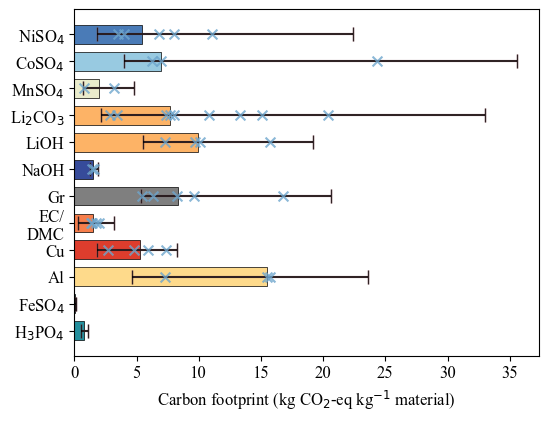

In [14]:


# Data
materials = ['H$_3$PO$_4$', 'FeSO$_4$', 'Al', 'Cu', 'EC/\nDMC', 'Gr', 'NaOH', 'LiOH', 'Li$_2$CO$_3$', 'MnSO$_4$', 'CoSO$_4$', 'NiSO$_4$']
min_values = [0.5, 0.06, 4.65, 1.9, 0.3, 5.3, 1.3, 5.5, 2.1, 0.7, 4.0, 1.8]
median_values = [0.763, 0.087, 15.50, 5.3, 1.5, 8.3, 1.5, 9.9, 7.7, 2.0, 7.0, 5.4]
max_values = [1.06, 0.12, 23.60, 8.3, 3.2, 20.6, 1.9, 19.2, 33.0, 4.8, 35.6, 22.4]
plus_errors = [0.297, 0.033, 8.10, 2.99, 1.66, 12.33, 0.43, 9.30, 25.30, 2.81, 28.60, 17.00]
minus_errors = [ 0.263, 0.027, 10.85, 3.45, 1.20, 2.95, 0.22, 4.40, 5.59, 1.27, 3.00, 3.60]
literature_data = [ [],[],[15.7, 15.5, 7.3], [4.82, 7.37, 5.88, 2.72], [1.7, 1.37, 2.01, 1.38], [5.44, 8.27, 9.6, 6.3, 16.8], [1.59, 1.40], [15.7, 7.3, 9.7, 10.1], [10.8, 20.4, 2.9, 8, 7.7, 7.4, 3.4, 13.3, 15.1], [3.2, 0.8], [24.3, 7, 6.27], [8.04, 3.5, 4.0, 6.8, 11.1]]

plt.rcParams['font.size'] = 12
plt.rcParams["font.family"] = "Times New Roman"

# Bar positions
bar_positions = np.arange(len(materials))

fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(111)

#Grey shades
#colors = ['#6B6B6B', '#6B6B6B', '#9E9E9E', '#9E9E9E','#D0D0D0', '#D0D0D0', '#D0D0D0', '#D0D0D0', '#D0D0D0', '#D0D0D0']

#Colorful
colors = [ '#238F9D','#125A56', '#FEDA8B', '#DD3D2D', '#F67E4B', '#7F7F7F','#364B9A', '#FDB366', '#FDB366', '#EAECCC', '#98CAE1', '#4A7BB7']

# Plot the bars
bar_width = 0.7
#ax.barh(bar_positions - bar_width/2, median_values, bar_width, label='Median', color=colors)
ax.barh(bar_positions - bar_width/2, median_values, bar_width, label='Median', color=colors, edgecolor='black', linewidth=0.5)

# Plot the error bars with changed color and alpha
ax.errorbar(median_values, bar_positions - bar_width/2, xerr=[minus_errors, plus_errors], fmt='none', capsize=5, color='#EE99AA', alpha=0.8)

# Plot the literature data with changed marker color and alpha, and bring to front
for i in range(len(materials)):
    if literature_data[i]:
        ax.scatter(literature_data[i], [i - bar_width/2] * len(literature_data[i]), color='#6EA6CD', marker='x', s=50, alpha=0.8, zorder=10)

# Set the y-axis labels
ax.set_yticks(bar_positions - bar_width/2)
ax.set_yticklabels(materials, fontsize=12, fontname='Times New Roman')
#ax.set_yticks(bar_positions)
#ax.set_yticklabels(materials, fontsize=12, fontname='Times New Roman')

#ax.set_yticklabels([])
# Set the x-axis label
ax.set_xlabel('Carbon footprint (kg CO$_2$-eq kg$^{-1}$ material)', fontsize=12, fontname='Times New Roman')



# Plot the error bars with changed color and alpha
ax.errorbar(median_values, bar_positions - bar_width/2, xerr=[minus_errors, plus_errors], fmt='none', capsize=5, color='black', alpha=0.8)

plt.savefig("Material variability.png", dpi=300, bbox_inches='tight')

A Monte Carlo simulation was ran, by combining the material demand to produce each battery chemistry with the carbon footprint of battery materials. The latter was assumed to vary based on a uniform distribution, with min/max values taken from the graph above (Fig.2 in the original paper). 

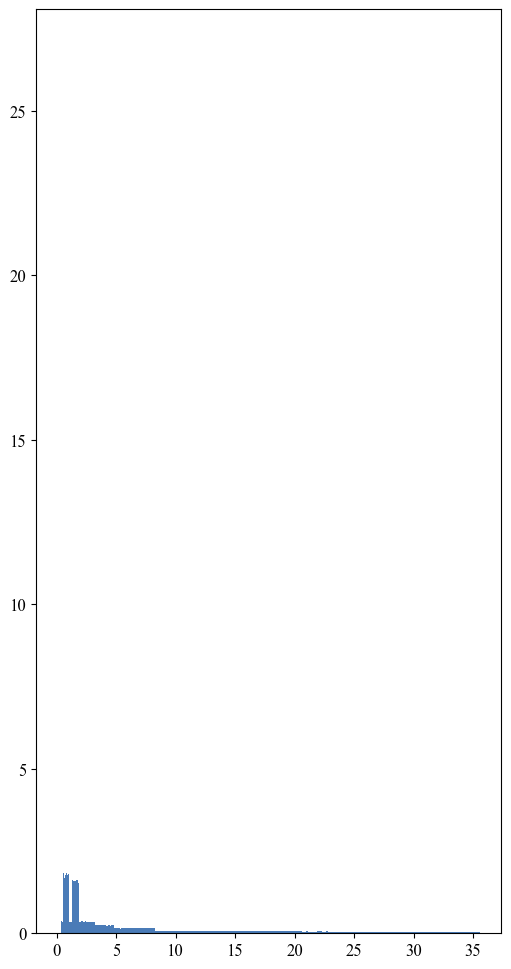

In [17]:

#Lithium hydroxide 
LiOH = np.random.uniform(5.5, 19.2, 100000)
LiH=plt.hist(LiOH, bins=100, density=True, color='#4A7BB7')
#plt.title("LiOH")
#plt.xlabel("kg CO2-eq/kg")
#plt.show()

#Lithium carbonate
Li2CO3 = np.random.uniform(2.11, 33 , 100000)
LiC=plt.hist(Li2CO3, bins=100, density=True, color='#4A7BB7')
#plt.title("Li2CO3")
#plt.xlabel("kg CO2-eq/kg")
#plt.show()

#Graphite
Gr= np.random.uniform(5.3, 20.6, 100000)  
G=plt.hist(Gr, bins=100, density=True, color='#4A7BB7')
#plt.title("Gr")
#plt.xlabel("kg CO2-eq/kg")
#plt.show()
#Cobalt
CoSO4= np.random.uniform(4, 35.6, 100000) # bottom Paulikas/ mode Dai et al./ right Zhang et al 
Co=plt.hist(CoSO4, bins=100, density=True, color='#4A7BB7')
#plt.title("CoSO4")
#plt.xlabel("kg CO2-eq/kg")
#plt.show()
#Nickel
NiSO4= np.random.uniform(1.8, 22.4, 100000) # bottom Nickel Institute/ mode Paulikas et al./ right GREET 
Ni=plt.hist(NiSO4, bins=100, density=True, color='#4A7BB7')
#plt.title("NiSO4")
#plt.xlabel("kg CO2-eq/kg")
#plt.show()
#Manganese (hydrate)
MnSO4= np.random.uniform(0.72, 4.8, 100000) 
Mn=plt.hist(MnSO4, bins=100, density=True, color='#4A7BB7')
#plt.title("MnSO4")
#plt.xlabel("kg CO2-eq/kg")
#plt.show()

#Copper foil
Cu= np.random.uniform(1.9, 8.3, 100000) 
Copp=plt.hist(Cu, bins=100, density=True, color='#4A7BB7')
#plt.title("Cu")
#plt.xlabel("kg CO2-eq/kg")
#plt.show()

#Aluminium foil
Al= np.random.uniform(4.6, 23.6, 100000) 
Alum=plt.hist(Al, bins=100, density=True, color='#4A7BB7')
#plt.title("Al")
#plt.xlabel("kg CO2-eq/kg")
#plt.show()

# Sodium hydroxide
NaOH= np.random.uniform(1.28, 1.9, 100000) 
Na=plt.hist(NaOH, bins=100, density=True, color='#4A7BB7')
#plt.title("NaOH")
#plt.xlabel("kg CO2-eq/kg")
#plt.show()

# Ethylene/Dimethyl carbonate
EC= np.random.uniform(0.35, 3.2, 100000) # left GREET (US)/ mode Ecoinvent  (RoW)/ right Ecoinvent (CN)
EthylC=plt.hist(EC, bins=100, density=True, color='#4A7BB7')
#plt.title("EC/DMC")
#plt.xlabel("kg CO2-eq/kg")
#plt.show()

# Phosphoric acid
PO4= np.random.uniform(0.5, 1.06, 100000) # left GREET (US)/ mode Ecoinvent  (RoW)/ right Ecoinvent (CN)
PO=plt.hist(PO4, bins=100, density=True, color='#4A7BB7')
#plt.title("H3PO4")
#plt.xlabel("kg CO2-eq/kg")
#plt.show()

#Iron sulphate
IS= np.random.uniform(0.08, 0.12, 100000) # left GREET (US)/ mode Ecoinvent  (RoW)/ right Ecoinvent (CN)
ISu=plt.hist(IS, bins=100, density=True, color='#4A7BB7')
#plt.title("FeSO4")
#plt.xlabel("kg CO2-eq/kg")
#plt.show()


Next, the material contribution to the carbon footprint of LIBs was estimated through the Monte Carlo simulation. 

Confidence interval for NMC
111  : (27.96, 100.48)
Confidence interval for NMC
622  : (22.58, 89.60)
Confidence interval for NMC
811  : (13.41, 81.40)
Confidence interval for NCA: (12.24, 83.24)
Confidence interval for LFP: (11.89, 44.87)
Confidence interval for LIB
aver. : (22.18, 75.34)
95% confidence interval for NMC
111  : (39.65, 88.88)
95% confidence interval for NMC
622  : (33.78, 78.37)
95% confidence interval for NMC
811  : (27.19, 67.63)
95% confidence interval for NCA: (27.11, 68.35)
95% confidence interval for LFP: (18.30, 38.44)
95% confidence interval for LIB
aver. : (31.15, 66.45)


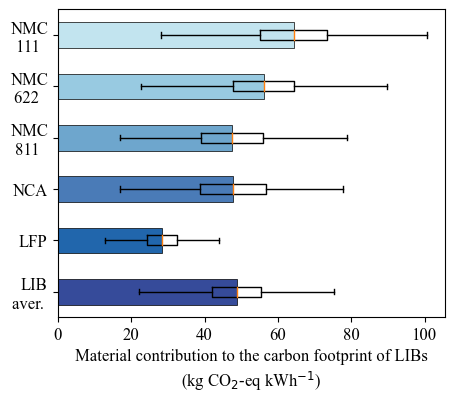


Medians:
NMC
111  : 64.28
NMC
622  : 56.12
NMC
811  : 47.42
NCA: 47.78
LFP: 28.39
LIB
aver. : 48.80


In [18]:
#Carbon footprint calculation for NMC333-Gr
CF_NMC33= akgkWhNaOH*NaOH+akgkWhCu*Cu+akgkWhCoSO4*CoSO4+akgkWhMnSO4*MnSO4+akgkWhNiSO4*NiSO4+akgkWhGr*Gr+akgkWhLi2CO3*Li2CO3+akgkWhEC*EC+akgkWhAl*Al
#Carbon footprint calculation for NMC811-Gr
CF_NMC62= ckgkWhNaOH*NaOH+ckgkWhCu*Cu+ckgkWhCoSO4*CoSO4+ckgkWhMnSO4*MnSO4+ckgkWhNiSO4*NiSO4+ckgkWhGr*Gr+ckgkWhLi2CO3*Li2CO3+ckgkWhEC*EC+ckgkWhAl*Al
#Carbon footprint calculation for NMC811-Gr 
CF_NMC811= bkgkWhNaOH*NaOH+bkgkWhCu*Cu+bkgkWhCoSO4*CoSO4+bkgkWhMnSO4*MnSO4+bkgkWhNiSO4*NiSO4+bkgkWhGr*Gr+bkgkWhLiOH*Li2CO3+bkgkWhEC*EC+bkgkWhAl*Al
#Carbon footprint calculation for NCA-Gr
CF_NCA= dkgkWhNaOH*NaOH+dkgkWhCu*Cu+dkgkWhCoSO4*CoSO4+dkgkWhMnSO4*MnSO4+dkgkWhNiSO4*NiSO4+dkgkWhGr*Gr+dkgkWhLiOH*LiOH+dkgkWhEC*EC+dkgkWhAl*Al
#Carbon footprint calculation for LFP-Gr
CF_LFP= 0*NaOH+ekgkWhCu*Cu+ekgkWhH3PO4*PO4+ekgkWhFeSO4*IS+0*NiSO4+ekgkWhGr*Gr+ekgkWhLiOH*LiOH+ekgkWhEC*EC+ekgkWhAl*Al

#Aggregate carbon footprint for NCX chemistries
CF_av=(CF_NMC33+CF_NMC62+CF_NMC811+CF_NCA+CF_LFP)/5

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12


a=['NMC\n111  ', 'NMC\n622  ', 'NMC\n811  ','NCA','LFP','LIB\naver. ']
b=[CF_NMC33.mean(),CF_NMC62.mean(),CF_NMC811.mean(),CF_NCA.mean(), CF_LFP.mean(), CF_av.mean()]
d=[CF_NMC33,CF_NMC62,CF_NMC811,CF_NCA,CF_LFP, CF_av]

colors = ['#C2E4EF','#98CAE1', '#6EA6CD','#4A7BB7', '#2166AC','#364B9A' ]
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.figure(figsize=(5, 4))
bp = plt.boxplot(d, positions=[0,1,2,3,4,5], showfliers=False, vert=False, labels=a, widths=0.2)
plt.barh(a, b, height=0.5, color=colors, edgecolor='black', linewidth=0.5)
plt.xlabel("Material contribution to the carbon footprint of LIBs\n(kg CO$_2$-eq kWh$^{-1}$)")
plt.gca().invert_yaxis()

# Calculate and print the confidence interval for each box
for i in range(len(a)):
    q1, q3 = np.percentile(d[i], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f"Confidence interval for {a[i]}: ({lower_bound:.2f}, {upper_bound:.2f})")

    # Calculate and print the 95% confidence interval for each box
confidence_interval_percentage = 95
lower_percentile = (100 - confidence_interval_percentage) / 2
upper_percentile = 100 - lower_percentile

for i in range(len(a)):
    lower_bound = np.percentile(d[i], lower_percentile)
    upper_bound = np.percentile(d[i], upper_percentile)
    print(f"{confidence_interval_percentage}% confidence interval for {a[i]}: ({lower_bound:.2f}, {upper_bound:.2f})")

    # Calculate medians
medians = [np.median(arr) for arr in d]
# Save the plot as a high resolution image
plt.savefig("battery_materials_carbon.png", dpi=300, bbox_inches='tight')
plt.show()



# Print medians outside of the graph as text
print("\nMedians:")
for i, median in enumerate(medians):
    print(f"{a[i]}: {median:.2f}")


The energy contribution to the carbon footprint of a LIB was estimated by assuming that manufacturing consumes 40 to 80 kWh of energy per kWh of cell capacity. Key manufacturing locations around the world were considered based on gigafactory projections. 

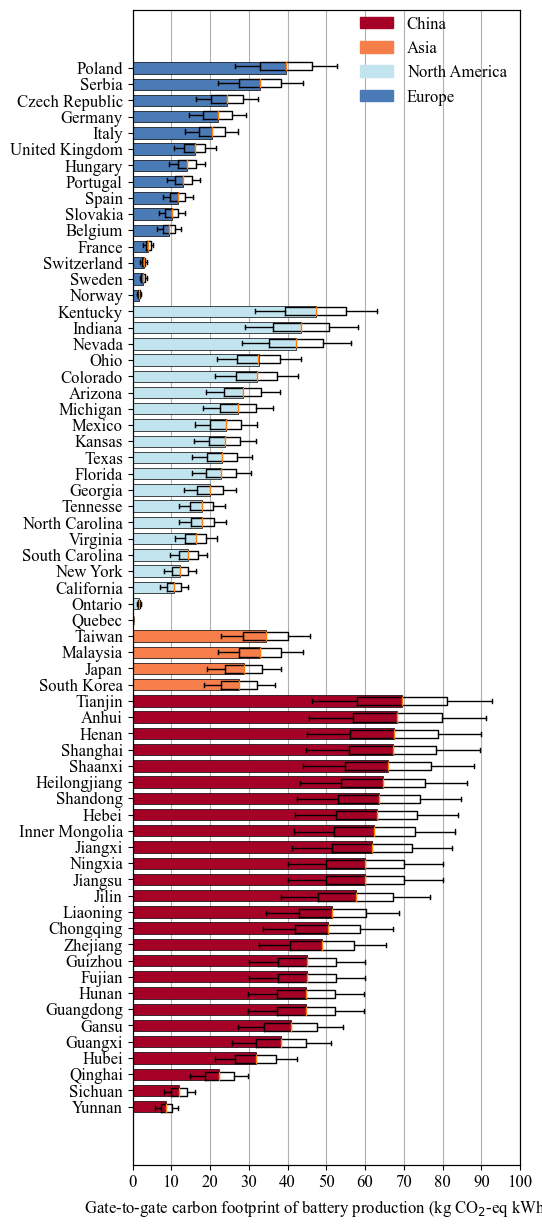

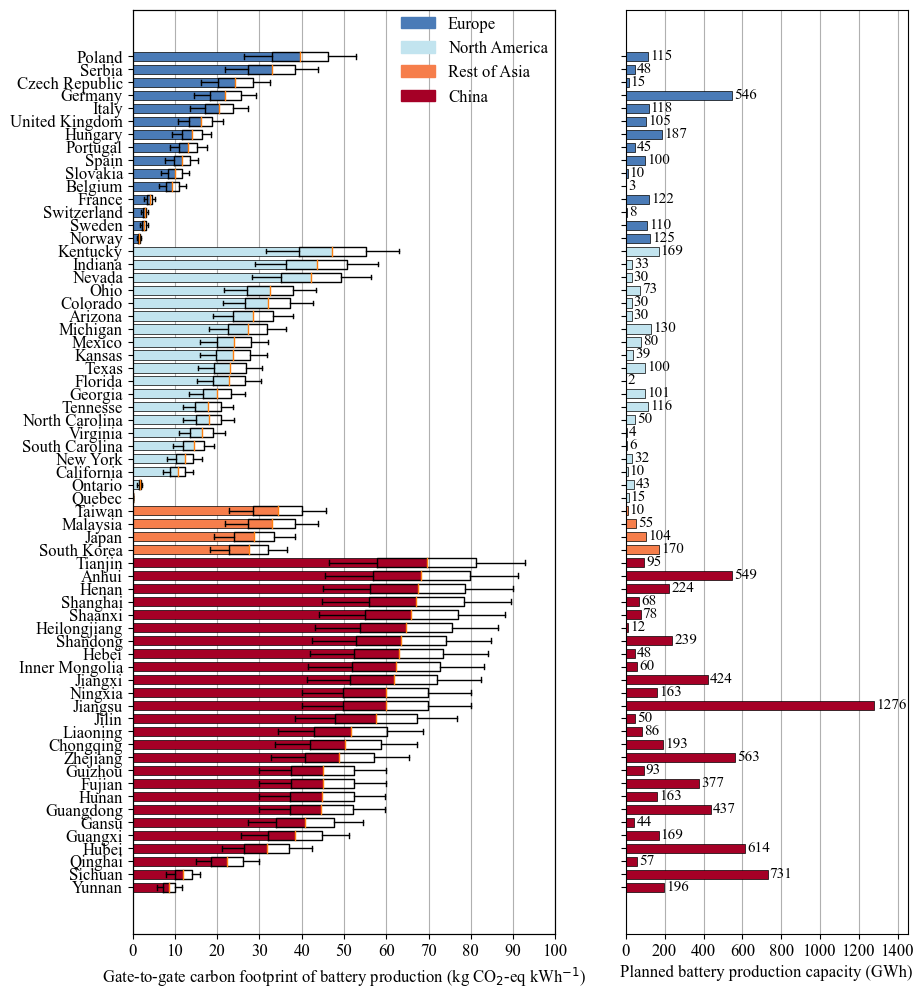

In [19]:
plt.rcParams['font.size'] = 12

#Energy contributions, includes cell manufacturing and cathode.
E= np.random.uniform(40,80,100000)


#Carbon intensity of electricity

# China https://www.sciencedirect.com/science/article/pii/S1876610217361714
Yunnan=145
Sichuan=200
Qinghai=373
Hubei=530
Guangxi=640
Gansu=680
Guangdong=745
Hunan=747
Fujian=750
Guizhou=750
Zhejiang=816
Chongqing=840
Liaoning=860
Jilin=960
Jiangsu=1000
Ningxia=1000
Jiangxi=1030
Inner_Mongolia=1040
Hebei=1050
Shandong=1060
Heilongjiang=1080
Shaanxi=1100
Shanghai=1120
Henan=1125
Anhui=1140
Tianjin=1160

#https://ourworldindata.org/grapher/carbon-intensity-electricity 2021

Korea=458
Japan= 479
Malaysia =549
Taiwan=573


#North America

#US https://www.statista.com/statistics/1133295/electric-sector-carbon-dioxide-emission-rate-by-state-united-states/
Kentucky= 788
Indiana=726
Nevada=704
Ohio=542
Colorado=533.5
Arizona=474.5
Michigan=454.5
Mexico=400
Kansas=397
Texas= 384
Florida=381
Georgia=332.9
Tennesse= 298
North_Carolina= 300
Virginia=272
South_Carolina=240.5
New_York=205
California= 177.3
Ontario=28
Quebec=1.9


#Europe https://ourworldindata.org/grapher/carbon-intensity-electricity?time=latest
Norway= 26
Sweden= 46
Switzerland=47
France= 67
Belgium=157
Slovakia=168
Spain=194
Portugal= 219
Hungary=233
UK=268
Italy=341
Germany=366
Czech=406
Serbia=549
Poland=660

#China

CN1=E*Yunnan/1000
CN2=E*Sichuan/1000
CN3=E*Qinghai/1000
CN4=E*Hubei/1000
CN5=E*Guangxi/1000
CN6=E*Gansu/1000
CN7=E*Guangdong/1000
CN8=E*Hunan/1000
CN9=E*Fujian/1000
CN10=E*Guizhou/1000
CN11=E*Zhejiang/1000
CN12=E*Chongqing/1000
CN13=E*Liaoning/1000
CN14=E*Jilin/1000
CN15=E*Jiangsu/1000
CN16=E*Ningxia/1000
CN17=E*Jiangxi/1000
CN18=E*Inner_Mongolia/1000
CN19=E*Hebei/1000
CN20=E*Shandong/1000
CN21=E*Heilongjiang/1000
CN22=E*Shaanxi/1000
CN23=E*Shanghai/1000
CN24=E*Henan/1000
CN25=E*Anhui/1000
CN26=E*Tianjin/1000

#Asia
AS1=E*Korea/1000
AS2=E*Japan/1000
AS3=E*Malaysia/1000
AS4=E*Taiwan/1000

#North America

NA20=E*Kentucky/1000
NA19=E*Indiana/1000
NA18=E*Nevada/1000
NA17=E*Ohio/1000
NA16=E*Colorado/1000
NA15=E*Arizona/1000
NA14=E*Michigan/1000
NA13=E*Mexico/1000
NA12=E*Kansas/1000
NA11=E*Texas/1000
NA10=E*Florida/1000
NA9=E*Georgia/1000
NA8=E*Tennesse/1000
NA7=E*North_Carolina/1000
NA6=E*Virginia/1000
NA5=E*South_Carolina/1000
NA4=E*New_York/1000
NA3=E*California/1000
NA2=E*Ontario/1000
NA1=E*Quebec/1000


#Europe

EU1=E/1000*Norway
EU2=E/1000*Sweden
EU3=E/1000*Switzerland
EU4=E/1000*France
EU5=E/1000*Belgium
EU6=E/1000*Slovakia
EU7=E/1000*Spain
EU8=E/1000*Portugal
EU9=E/1000*Hungary
EU10=E/1000*UK
EU11=E/1000*Italy
EU12=E/1000*Germany
EU13=E/1000*Czech
EU14=E/1000*Serbia
EU15=E/1000*Poland





y_axis = ["Yunnan", "Sichuan", "Qinghai", "Hubei", "Guangxi", "Gansu", "Guangdong", "Hunan", "Fujian", "Guizhou",           "Zhejiang", "Chongqing", "Liaoning", "Jilin", "Jiangsu", "Ningxia", "Jiangxi", "Inner Mongolia", "Hebei",           "Shandong", "Heilongjiang", "Shaanxi", "Shanghai", "Henan", "Anhui", "Tianjin", "South Korea", "Japan", "Malaysia",          "Taiwan",           "Quebec", "Ontario", "California", "New York", "South Carolina", "Virginia", "North Carolina", "Tennesse", "Georgia",           "Florida","Texas", "Kansas", "Mexico", "Michigan", "Arizona", "Colorado", "Ohio", "Nevada", "Indiana", "Kentucky",          "Norway", "Sweden", "Switzerland", "France", "Belgium", "Slovakia", "Spain", "Portugal", "Hungary",           "United Kingdom", "Italy", "Germany", "Czech Republic", "Serbia", "Poland", ]

x_axis= [CN1.mean(), CN2.mean(), CN3.mean(), CN4.mean(), CN5.mean(),        CN6.mean(), CN7.mean(), CN8.mean(), CN9.mean(), CN10.mean(),        CN11.mean(), CN12.mean(), CN13.mean(),CN14.mean(), CN15.mean(),  CN16.mean(), CN17.mean(), CN18.mean(),CN19.mean(), CN20.mean(),        CN21.mean(), CN22.mean(), CN23.mean(),CN24.mean(), CN25.mean(),CN26.mean(),         AS1.mean(), AS2.mean(),AS3.mean(),AS4.mean(),        NA1.mean(), NA2.mean(), NA3.mean(), NA4.mean(), NA5.mean(), NA6.mean(), NA7.mean(), NA8.mean(),        NA9.mean(), NA10.mean(), NA11.mean(), NA12.mean(), NA13.mean(), NA14.mean(), NA15.mean(), NA16.mean(), NA17.mean(),        NA18.mean(), NA19.mean(), NA20.mean(),        EU1.mean(), EU2.mean(), EU3.mean(), EU4.mean(), EU5.mean(), EU6.mean(), EU7.mean(), EU8.mean(), EU9.mean(), EU10.mean(),         EU11.mean(), EU12.mean(), EU13.mean(), EU14.mean(), EU15.mean()]


import matplotlib.patches as mpatches



# Combine data
CN_data = [CN1, CN2, CN3, CN4, CN5, CN6, CN7, CN8, CN9, CN10, CN11, CN12, CN13, CN14, CN15, CN16, CN17, CN18, CN19, CN20, CN21, CN22, CN23, CN24, CN25, CN26]
AS_data = [AS1, AS2, AS3, AS4]
NA_data = [NA1, NA2, NA3, NA4, NA5, NA6, NA7, NA8, NA9, NA10, NA11, NA12, NA13, NA14, NA15, NA16, NA17, NA18, NA19, NA20]
EU_data = [EU1, EU2, EU3, EU4, EU5, EU6, EU7, EU8, EU9, EU10, EU11, EU12, EU13, EU14, EU15]
all_data = CN_data + AS_data + NA_data + EU_data

labels = y_axis
# Create a combined horizontal bar graph with box plot
fig, ax = plt.subplots(figsize=(5, 15))

# Define colors for each region
colors = ['#A50026']*len(CN_data) + ['#F67E4B']*len(AS_data) + ['#C2E4EF']*len(NA_data) + ['#4A7BB7']*len(EU_data)

# Horizontal bar graph
positions = np.arange(len(labels))
bar_width = 0.7
rects1 = ax.barh(positions - bar_width / 2, [np.mean(x) for x in all_data], bar_width, label='Mean', color=colors, edgecolor='black', linewidth=0.5)
# Add labels, title, and legend
ax.set_yticks(positions - bar_width / 2)
ax.set_yticklabels(labels, fontsize=12)
ax.set_xlabel("Gate-to-gate carbon footprint of battery production (kg CO$_2$-eq kWh$^{-1}$)", fontsize=12)
ax.legend()

# Box plot
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.boxplot(all_data, vert=False, positions=positions, widths=0.5, manage_ticks=False, showfliers=False)

# Add grid and background color
ax.grid(True, zorder=0,axis='x')
ax.set_axisbelow(True)
#ax.set_facecolor('none')

# Add color legend
cn_patch = mpatches.Patch(color='#A50026', label='China')
as_patch = mpatches.Patch(color='#F67E4B', label='Asia')
na_patch = mpatches.Patch(color='#C2E4EF', label='North America')
eu_patch = mpatches.Patch(color='#4A7BB7', label='Europe')
ax.legend(handles=[cn_patch, as_patch, na_patch, eu_patch], bbox_to_anchor=(0.57, 1), loc='upper left', borderaxespad=0., frameon=False)

# Increase the numbers shown in the x-axis
ax.set_xticks(np.arange(0, 101, 10))
ax2.set_xticks(np.arange(0, 101, 10))
# Show the plot
plt.show()


# Create a combined horizontal bar graph with box plot
#fig, ax = plt.subplots(figsize=(15, 15))
fig, (ax, ax3) = plt.subplots(ncols=2, figsize=(10, 12),gridspec_kw={'width_ratios': [1.5, 1]}, sharey=True)                              
ax2 = ax.twinx()

# Define colors for each region
colors = ['#A50026']*len(CN_data) + ['#F67E4B']*len(AS_data) + ['#C2E4EF']*len(NA_data) + ['#4A7BB7']*len(EU_data)

# Horizontal bar graph
positions = np.arange(len(labels))
bar_width = 0.7
rects1 = ax.barh(positions - bar_width / 2, [np.mean(x) for x in all_data], bar_width, label='Mean', color=colors, edgecolor='black', linewidth=0.5)

# Add labels, title, and legend
ax.set_yticks(positions - bar_width / 2)
ax.set_yticklabels(labels, fontsize=12)
ax.set_xlabel("Gate-to-gate carbon footprint of battery production (kg CO$_2$-eq kWh$^{-1}$)", fontsize=12)
ax.legend()

#Export means in xlsx
# Calculate mean values
mean_values = [np.mean(x) for x in all_data]
import pandas as pd
# Create a DataFrame
data = {'Location': labels, 'Mean Value': mean_values}
df = pd.DataFrame(data)

# Export to Excel
df.to_excel("GTG.xlsx", index=False)


# Box plot
ax2.set_yticks([])
ax2.boxplot(all_data, vert=False, positions=positions, widths=0.7, manage_ticks=False, showfliers=False)

# Add grid and background color
ax.grid(True, zorder=0,axis='x')
ax.set_axisbelow(True)

# Add color legend
eu_patch = mpatches.Patch(color='#4A7BB7', label='Europe')
na_patch = mpatches.Patch(color='#C2E4EF', label='North America')
as_patch = mpatches.Patch(color='#F67E4B', label='Rest of Asia')
cn_patch = mpatches.Patch(color='#A50026', label='China')



ax.legend(handles=[eu_patch, na_patch, as_patch, cn_patch ], bbox_to_anchor=(0.62, 1), loc='upper left', borderaxespad=0., frameon=False)

# Increase the numbers shown in the x-axis
ax.set_xticks(np.arange(0, 101, 10))


#Planned capacity
y=["Yunnan", "Sichuan", "Qinghai", "Hubei", "Guangxi", "Gansu", "Guangdong", "Hunan", "Fujian", "Guizhou",           "Zhejiang", "Chongqing", "Liaoning", "Jilin", "Jiangsu", "Ningxia", "Jiangxi", "Inner Mongolia", "Hebei",           "Shandong", "Heilongjiang", "Shaanxi", "Shanghai", "Henan", "Anhui", "Tianjin", "South Korea", "Japan", "Malaysia",          "Taiwan",           "Quebec", "Ontario", "California", "New York", "South Carolina", "Virginia", "North Carolina", "Tennesse", "Georgia",           "Florida","Texas", "Kansas", "Mexico", "Michigan", "Arizona", "Colorado", "Ohio", "Nevada", "Indiana", "Kentucky",          "Norway", "Sweden", "Switzerland", "France", "Belgium", "Slovakia", "Spain", "Portugal", "Hungary",           "United Kingdom", "Italy", "Germany", "Czech Republic", "Serbia", "Poland" ]

#Planned GWh capacity
x= [196, 731, 57, 614, 169, 44, 437, 163, 377, 93, 563, 193, 86, 50, 1276, 163, 424, 60, 48, 239, 12, 78, 68, 224, 549, 95,    170, 104, 55, 10,    15, 43, 10, 32, 6, 4, 50, 116, 101, 2, 100, 39, 80, 130, 30, 30, 73, 30 , 33, 169,    125, 110, 8 ,122, 3, 10, 100, 45, 187, 105, 118, 546, 15, 48, 115 ]





# Create a new subplot next to the original plot with a different x-axis
#ax3 = fig.add_subplot(1, 2, 2, sharey=ax)
ax3.set_xlabel('Planned battery production capacity (GWh)')
#ax3.set_ylabel('Planned battery production capacity (GWh)')
ax3.set_xticks(np.arange(0, 1401, 200))
#ax3.set_xticklabels([])
ax3.set_xlim([0, 1450])
ax3.barh(positions - bar_width / 2, x, bar_width, color=['#A50026','#A50026','#A50026','#A50026','#A50026','#A50026',                                           '#A50026','#A50026','#A50026','#A50026','#A50026','#A50026',                                           '#A50026','#A50026','#A50026','#A50026','#A50026','#A50026',                                           '#A50026','#A50026','#A50026','#A50026','#A50026','#A50026',                                           '#A50026','#A50026',                                           '#F67E4B','#F67E4B','#F67E4B','#F67E4B',                                           '#C2E4EF','#C2E4EF','#C2E4EF','#C2E4EF','#C2E4EF',                                           '#C2E4EF','#C2E4EF','#C2E4EF','#C2E4EF','#C2E4EF',                                           '#C2E4EF','#C2E4EF','#C2E4EF','#C2E4EF','#C2E4EF',                                           '#C2E4EF','#C2E4EF','#C2E4EF','#C2E4EF','#C2E4EF',                                           '#4A7BB7','#4A7BB7','#4A7BB7','#4A7BB7','#4A7BB7',                                           '#4A7BB7','#4A7BB7','#4A7BB7','#4A7BB7','#4A7BB7',                                           '#4A7BB7','#4A7BB7','#4A7BB7','#4A7BB7','#4A7BB7'], edgecolor='black', linewidth=0.5)
ax3.grid(True, zorder=0, axis='x')
# Add grid and background color
# Add data labels
for i, v in enumerate(x):
    ax3.text(v+10, i-0.6, str(v), color='black', fontsize=11)
ax3.set_axisbelow(True)



plt.savefig("CF_Manufacturing", dpi=1000, bbox_inches='tight')
plt.show()

The energy and material contributions to the carbon footprint were combined to estimate the cradle-to-gate carbon footprint of LIBs.

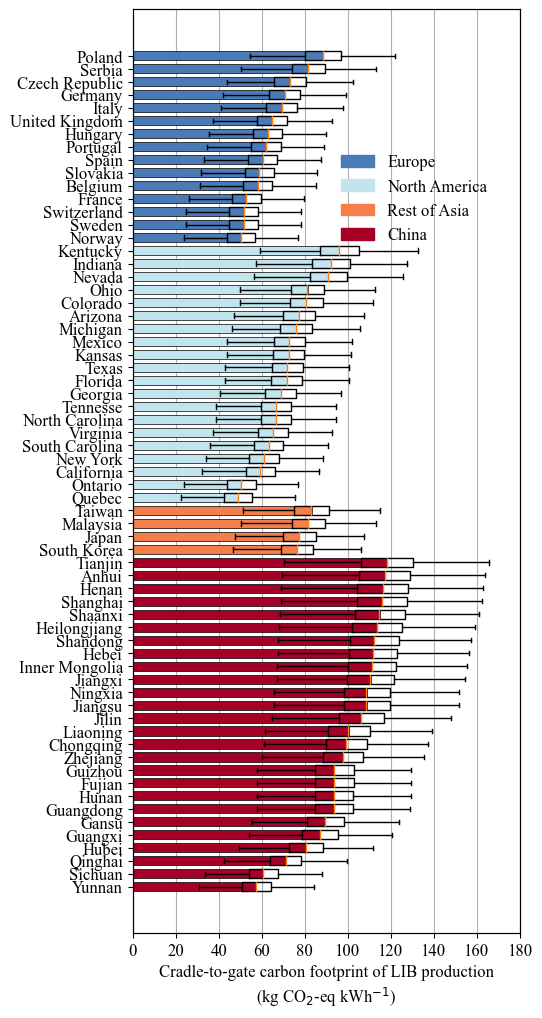

In [20]:
#Combined energy and materials graph, total carbon footprint of NMC batteries

#China

CN1=E*Yunnan/1000+CF_av
CN2=E*Sichuan/1000+CF_av
CN3=E*Qinghai/1000+CF_av
CN4=E*Hubei/1000+CF_av
CN5=E*Guangxi/1000+CF_av
CN6=E*Gansu/1000+CF_av
CN7=E*Guangdong/1000+CF_av
CN8=E*Hunan/1000+CF_av
CN9=E*Fujian/1000+CF_av
CN10=E*Guizhou/1000+CF_av
CN11=E*Zhejiang/1000+CF_av
CN12=E*Chongqing/1000+CF_av
CN13=E*Liaoning/1000+CF_av
CN14=E*Jilin/1000+CF_av
CN15=E*Jiangsu/1000+CF_av
CN16=E*Ningxia/1000+CF_av
CN17=E*Jiangxi/1000+CF_av
CN18=E*Inner_Mongolia/1000+CF_av
CN19=E*Hebei/1000+CF_av
CN20=E*Shandong/1000+CF_av
CN21=E*Heilongjiang/1000+CF_av
CN22=E*Shaanxi/1000+CF_av
CN23=E*Shanghai/1000+CF_av
CN24=E*Henan/1000+CF_av
CN25=E*Anhui/1000+CF_av
CN26=E*Tianjin/1000+CF_av

#Asia
AS1=E*Korea/1000+CF_av
AS2=E*Japan/1000+CF_av
AS3=E*Malaysia/1000+CF_av
AS4=E*Taiwan/1000+CF_av

#North America

NA20=E*Kentucky/1000+CF_av
NA19=E*Indiana/1000+CF_av
NA18=E*Nevada/1000+CF_av
NA17=E*Ohio/1000+CF_av
NA16=E*Colorado/1000+CF_av
NA15=E*Arizona/1000+CF_av
NA14=E*Michigan/1000+CF_av
NA13=E*Mexico/1000+CF_av
NA12=E*Kansas/1000+CF_av
NA11=E*Texas/1000+CF_av
NA10=E*Florida/1000+CF_av
NA9=E*Georgia/1000+CF_av
NA8=E*Tennesse/1000+CF_av
NA7=E*North_Carolina/1000+CF_av
NA6=E*Virginia/1000+CF_av
NA5=E*South_Carolina/1000+CF_av
NA4=E*New_York/1000+CF_av
NA3=E*California/1000+CF_av
NA2=E*Ontario/1000+CF_av
NA1=E*Quebec/1000+CF_av


#Europe

EU1=E/1000*Norway+CF_av
EU2=E/1000*Sweden+CF_av
EU3=E/1000*Switzerland+CF_av
EU4=E/1000*France+CF_av
EU5=E/1000*Belgium+CF_av
EU6=E/1000*Slovakia+CF_av
EU7=E/1000*Spain+CF_av
EU8=E/1000*Portugal+CF_av
EU9=E/1000*Hungary+CF_av
EU10=E/1000*UK+CF_av
EU11=E/1000*Italy+CF_av
EU12=E/1000*Germany+CF_av
EU13=E/1000*Czech+CF_av
EU14=E/1000*Serbia+CF_av
EU15=E/1000*Poland+CF_av

# Combine data
CN_data = [CN1, CN2, CN3, CN4, CN5, CN6, CN7, CN8, CN9, CN10, CN11, CN12, CN13, CN14, CN15, CN16, CN17, CN18, CN19, CN20, CN21, CN22, CN23, CN24, CN25, CN26]
AS_data = [AS1, AS2, AS3, AS4]
NA_data = [NA1, NA2, NA3, NA4, NA5, NA6, NA7, NA8, NA9, NA10, NA11, NA12, NA13, NA14, NA15, NA16, NA17, NA18, NA19, NA20]
EU_data = [EU1, EU2, EU3, EU4, EU5, EU6, EU7, EU8, EU9, EU10, EU11, EU12, EU13, EU14, EU15]
all_data = CN_data + AS_data + NA_data + EU_data


labels = ["Yunnan", "Sichuan", "Qinghai", "Hubei", "Guangxi", "Gansu", "Guangdong", "Hunan", "Fujian", "Guizhou",           "Zhejiang", "Chongqing", "Liaoning", "Jilin", "Jiangsu", "Ningxia", "Jiangxi", "Inner Mongolia", "Hebei",           "Shandong", "Heilongjiang", "Shaanxi", "Shanghai", "Henan", "Anhui", "Tianjin", "South Korea", "Japan", "Malaysia",          "Taiwan",           "Quebec", "Ontario", "California", "New York", "South Carolina", "Virginia", "North Carolina", "Tennesse", "Georgia",           "Florida","Texas", "Kansas", "Mexico", "Michigan", "Arizona", "Colorado", "Ohio", "Nevada", "Indiana", "Kentucky",          "Norway", "Sweden", "Switzerland", "France", "Belgium", "Slovakia", "Spain", "Portugal", "Hungary",           "United Kingdom", "Italy", "Germany", "Czech Republic", "Serbia", "Poland", ]

# Create a combined horizontal bar graph with box plot
fig, ax = plt.subplots(figsize=(5, 12))

# Define colors for each region
colors = ['#A50026']*len(CN_data) + ['#F67E4B']*len(AS_data) + ['#C2E4EF']*len(NA_data) + ['#4A7BB7']*len(EU_data)

# Horizontal bar graph
positions = np.arange(len(labels))
bar_width = 0.7
rects1 = ax.barh(positions - bar_width / 2, [np.mean(x) for x in all_data], bar_width, label='Mean', color=colors,edgecolor='black', linewidth=0.5)

# Add labels, title, and legend
ax.set_yticks(positions - bar_width / 2)
ax.set_yticklabels(labels, fontsize=12)
ax.set_xlabel("Cradle-to-gate carbon footprint of LIB production\n(kg CO$_2$-eq kWh$^{-1}$)", fontsize=12)
ax.legend()

# Box plot
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.boxplot(all_data, vert=False, positions=positions, widths=0.7, manage_ticks=False, showfliers=False)

# Add grid and background color
ax.grid(True, zorder=0,axis='x')
ax.set_axisbelow(True)
ax.set_facecolor('none')

# Add color legend
cn_patch = mpatches.Patch(color='#A50026', label='China')
as_patch = mpatches.Patch(color='#F67E4B', label='Rest of Asia')
na_patch = mpatches.Patch(color='#C2E4EF', label='North America')
eu_patch = mpatches.Patch(color='#4A7BB7', label='Europe')
ax.legend(handles=[eu_patch, na_patch, as_patch,  cn_patch], bbox_to_anchor=(0.52, 0.85), loc='upper left', borderaxespad=0., frameon=False)

# Increase the numbers shown in the x-axis
ax.set_xticks(np.arange(0, 181, 20))
ax2.set_xticks(np.arange(0, 181, 20))
# Show the plot
plt.savefig("CF_CTG", dpi=1000, bbox_inches='tight')
plt.show()


Finally, a rough calculation was performed to estimate the carbon emissions of the battery industry globally. 

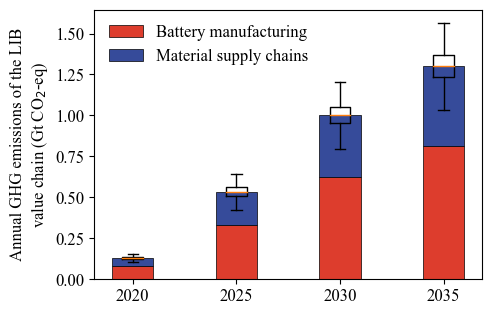

In [21]:
#Global LIB emissions


plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

GLO_data= (CN1+ CN2+ CN3+ CN4+ CN5+ CN6+ CN7+ CN8+ CN9+ CN10+ CN11+ CN12+ CN13+ CN14+ CN15+ CN16+ CN17           +CN18+ CN19 + CN20+ CN21+CN21+ CN23+ CN24+ CN25+ CN26 +AS1+AS2+ AS3+ AS4+NA1+ 
           NA2+ NA3+ NA4+ NA5+ NA6+ NA7+NA8+ NA9+ NA10+ NA11+ NA12+ NA13+ NA14+ NA15+ NA16+ NA17++ NA18+ NA19+ NA20\
           +EU1+ EU2+ EU3+ EU4+ EU5+ EU6+ EU7+ EU8+ EU9+ EU10+ EU11+ EU12 + EU13+  EU14+ EU15)/65
GLO = GLO_data.mean() # assuming a value for GLO
#Battery manufacturing 
E_CF2020= 1*1000000000*GLO
E_CF2025= 4.1*1000000000*GLO
E_CF2030= 7.7*1000000000*GLO
E_CF2035= 10*1000000000*GLO


#Material supply chain MtCO2
M_CF2020= 1*1000000000*CF_av
M_CF2025= 4.1*1000000000*CF_av
M_CF2030= 7.7*1000000000*CF_av
M_CF2035= 10*1000000000*CF_av


#Total carbon footprint
T_CF2020= M_CF2020+E_CF2020
T_CF2025= M_CF2025+E_CF2025
T_CF2030= M_CF2030+E_CF2030
T_CF2035= M_CF2035+E_CF2035

T_CF=[T_CF2020, T_CF2025, T_CF2030, T_CF2035]

years = [2020, 2025, 2030, 2035]

CF_av1 = CF_av.mean()  # assuming a value for CF_av




#Gt CO2-eq graphs
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

T_CF=[T_CF2020/1e12, T_CF2025/1e12, T_CF2030/1e12, T_CF2035/1e12]
GLO = GLO_data.mean()/1e12 # assuming a value for GLO
CF_av1 = CF_av.mean()/1e12  # assuming a value for CF_av
# Battery manufacturing
E_CF = [1*1000000000*GLO, 4.1*1000000000*GLO, 7.7*1000000000*GLO, 10*1000000000*GLO]

# Material supply chain
M_CF = [1*1000000000*CF_av1, 4.1*1000000000*CF_av1, 7.7*1000000000*CF_av1, 10*1000000000*CF_av1]

fig, ax1 = plt.subplots(figsize=(5, 3.5))

ax1.bar(years, E_CF, label="Battery manufacturing",color=  '#DD3D2D',width=2, edgecolor='black', linewidth=0.5)
ax1.bar(years, M_CF, bottom=E_CF, label="Material supply chains",color= '#364B9A', width=2,edgecolor='black', linewidth=0.5)


#ax1.set_xlabel("Years")
#ax1.set_title("Battery Manufacturing and Material Supply Chain Contributions")
ax1.legend(frameon=False)

# Adding the boxplot for total carbon footprint
#ax.legend(handles=[cn_patch, as_patch, na_patch, eu_patch], bbox_to_anchor=(0.65, 1), loc='upper left', borderaxespad=0., frameon=False)
ax1.boxplot(T_CF, positions=years, showfliers=False,widths=1)
#ax1.set_yticks(np.arange(0, 800, 200))
ax1.set_ylabel('Annual GHG emissions of the LIB\nvalue chain (Gt CO$_2$-eq)')
ax1.set_xticks(years)
ax1.set_xticklabels(years)

# Save the plot as a high resolution image


plt.savefig("Global_emissions.png", dpi=300, bbox_inches='tight')
plt.show()